# EDA

Цель:
- провести анализ данных
- определить типы данных в датасете
- определить наличие пропусков

# 1. Просмотр CSV-файла

In [15]:
import os
os.chdir("..")
from src.utils.paths import RAW_DATA_DIR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)



data = pd.read_csv(RAW_DATA_DIR / 'data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Информация и описание датасета

In [9]:
print(data.shape)
print(data.info())
print(data.describe())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

# 3. Проверка наличия пропусков

In [10]:
print('Количество пропусков в каждом столбце:')
print(data.isna().sum())

Количество пропусков в каждом столбце:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# 4. Анализ целевой переменной

<Axes: >

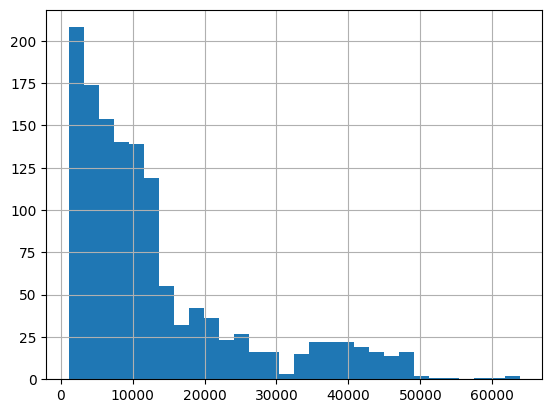

In [11]:
data['charges'].hist(bins=30)

# 5. Анализ числовых и категориальных признаков

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


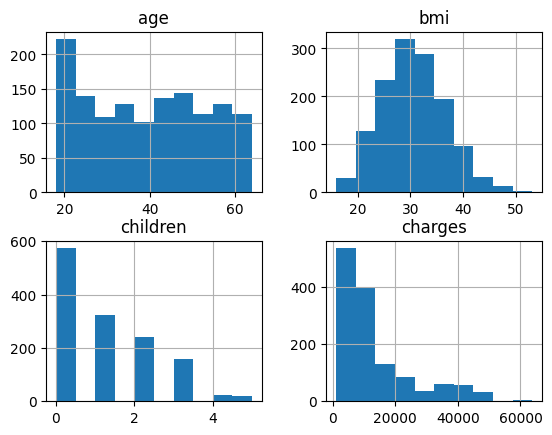

In [12]:
num_cols = data.select_dtypes(include='number').columns.tolist()
data[num_cols].hist()

cat_cols = data.select_dtypes(include='object').columns.tolist()
for column in cat_cols:
    print(data[column].value_counts().head())

# 6. Корреляция (создание heatmap-графика)

<Axes: >

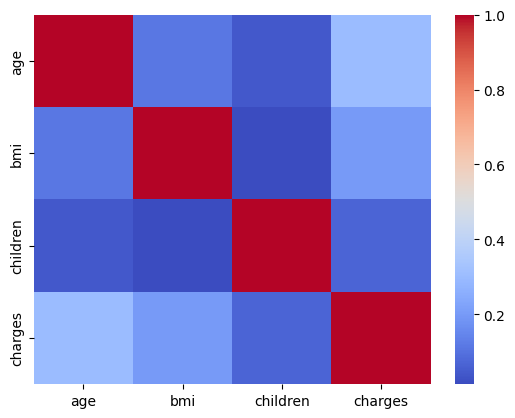

In [13]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')

# 7. Выводы

- пропусков не обнаружено
- датасет состоит из типов данных: int64, float64, object
- сильный дисбаланс классов yes/no в столбце smoker